In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as L

from tqdm import tqdm

## Data 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

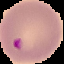

In [6]:
load_img(r"C:\Users\ASUS\Desktop\coding\Python\Deep Learning\Malaria Cell Detection\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_121102a_cell_193.png", target_size = (64,64))

In [7]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(2)

In [8]:
image_dir = r"C:\Users\ASUS\Desktop\coding\Python\Deep Learning\Malaria Cell Detection\Malarial Cell Image Data\malarial_cell_image_data\cell_images\cell_images"
size = 64
dataset = []
label = []

In [9]:
parasitized_img = os.listdir(image_dir + "\\Parasitized")

for i, img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Parasitized\\" + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(np.array(image))
        label.append(0)

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [00:14<00:00, 939.73it/s]


In [10]:
uninfected_img = os.listdir(image_dir+"\\Uninfected")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Uninfected\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

100%|██████████████████████████████████████████████████████████████████████████| 13780/13780 [00:13<00:00, 1022.24it/s]


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 0)

# CNN Architecture

In [12]:
Input_shape = (size,size,3)

inp = L.Input(shape = Input_shape)

conv1 = L.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = L.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = L.BatchNormalization(axis = -1)(pool1)
drop1 = L.Dropout(rate = 0.2)(norm1)

conv2 = L.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = L.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = L.BatchNormalization(axis = -1)(pool2)
drop2 = L.Dropout(rate = 0.2)(norm2)

conv3 = L.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = L.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = L.BatchNormalization(axis = -1)(pool3)
drop3 = L.Dropout(rate = 0.2)(norm3)

flat = L.Flatten()(drop3)

hidden1 = L.Dense(512,activation="relu")(flat)
norm3   = L.BatchNormalization(axis=-1)(hidden1)
drop3   = L.Dropout(rate=0.2)(norm3)

hidden2 = L.Dense(256,activation="relu")(drop3)
norm4   = L.BatchNormalization(axis=-1)(hidden2)
drop4   = L.Dropout(rate=0.2)(norm4)

out = L.Dense(2, activation='sigmoid')(drop4)

In [13]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [14]:
history = model.fit(np.array(X_train),y_train,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
311/311 [==============================] - 71s 221ms/step - loss: 0.5104 - accuracy: 0.7719 - val_loss: 2.8317 - val_accuracy: 0.6150
Epoch 2/10
311/311 [==============================] - 64s 207ms/step - loss: 0.2249 - accuracy: 0.9169 - val_loss: 0.3147 - val_accuracy: 0.9116
Epoch 3/10
311/311 [==============================] - 60s 192ms/step - loss: 0.1787 - accuracy: 0.9379 - val_loss: 0.3286 - val_accuracy: 0.8984
Epoch 4/10
311/311 [==============================] - 60s 192ms/step - loss: 0.1594 - accuracy: 0.9449 - val_loss: 0.1983 - val_accuracy: 0.9311
Epoch 5/10
311/311 [==============================] - 66s 211ms/step - loss: 0.1401 - accuracy: 0.9523 - val_loss: 0.2279 - val_accuracy: 0.9215
Epoch 6/10
311/311 [==============================] - 66s 212ms/step - loss: 0.1297 - accuracy: 0.9539 - val_loss: 0.1677 - val_accuracy: 0.9420
Epoch 7/10
311/311 [==============================] - 58s 187ms/step - loss: 0.1215 - accuracy: 0.9563 - val_loss: 0.1385 - val_ac

In [15]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(X_test),np.array(y_test))[1]*100))

173/173 [==============================] - 3s 18ms/step - loss: 0.1733 - accuracy: 0.9512
Test accuracy: 95.12%


In [16]:
model.save("malaria_cell_detection_tf213.h5")

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
